# What's new since last year's UGM? 2022 RDKit UGM Edition

Not an exhaustive list, just some examples.
Covers 2021.09, 2022.03, and the forthcoming 2022.09 release.

## Big code changes




### Backwards incompatible changes
(Ongoing)

We've started to gradually make changes to the code that may be either backwards incompatible or may change the default results. These are documented in a section of the release notes and are generally tagged with `Changes Results` in github.

Here are examples from the three releases covered here:

#### 2022.09 (not yet complete)
```
- `GetBestRMS() and CalcRMS()` by default now treat terminal conjugated functional
  groups like carboxylate and nitro symmetrically. For example, the group
  `C(=[O:1])[O-:2]` can match in either orientation. The SMARTS pattern which is
  used to recognize affected groups is:
  `[{atomP};$([{atomP}]-[*]=[{atomP}]),$([{atomP}]=[*]-[{atomP}])]~[*]` where
  `{atomP}` is `O,N;D1`. The previous behavior can be restored using by setting
  the `symmetrizeConjugatedTerminalGroups` argument to false when calling
  `GetBestRMS() and CalcRMS()`
- The following `#defines` are no longer provided in/used by the C++ code or `RDConfig.h`:
  - `BUILD_COORDGEN_SUPPORT`: use `RDK_BUILD_COORDGEN_SUPPORT` instead
  - `RDK_THREADSAFE_SSS`: use `RDK_BUILD_THREADSAFE_SSS` instead
  - `USE_BUILTIN_POPCOUNT`: use `RDK_OPTIMIZE_POPCNT` instead
- The Python function `Chem.GetSSSR()` now returns the SSSR rings found instead
  of just returning the count of rings. This is consistent with
  `Chem.GetSymmSSSR()` and more useful.
- The SMILES parser will ignore the value of
  `SmilesParserParams.useLegacyStereo` unless it is set to `false`. See the
  deprecation note about `useLegacyStereo` below for more information.
- The CFFI function `set_2d_coords_aligned()` now takes an additional `char **match_json`
  parameter; if `match_json` is not not `NULL`, `*match_json` will point to a
  JSON string containing the atoms and bonds which are part of the match.
  It is up to the user to free this string.
```

#### 2022.03
```
- When running in Jupyter Notebook, logs are now sent only to Python's
  standard error stream, and no longer include the `RDKit LEVEL` prefix.
- The Debug and Info logs are now disabled by default. If you would like to
  enable them within your code you can call `rdBase.EnableLog("rdApp.info")`
  and/or `rdBase.EnableLog("rdApp.debug")`.
- The MolHash functions now reassign stereochemistry after modifying the
  molecule and before calculating the hash. Previous versions would still
  include information about atom/bond stereochemistry in the output hash even if
  that no longer applies in the modified molecule.
- The rules for aromaticity in rings containing dummy atoms have been changed.
  The general intention of the new handling is that aromaticity will not be
  perceived for rings containing dummy atoms unless it's clear that the dummies
  should be aromatic. As an example: the SMILES `C1=C*2=CC=CC=*2C=C1` is
  perceived to be aromatic while the SMILES `C1=C*2C=CC=C*2C=C1` (which does not
  have any double bonds to the dummy atoms) is not; in previous RDKit releases
  both of these structures were aromatic. There's more information about this in
  the discussion of PR #4722 (https://github.com/rdkit/rdkit/pull/4722) and
  Issue #4721 (https://github.com/rdkit/rdkit/issues/4721).
- In the PostgreSQL cartridge the `mol_in()` function no longer performs full
  sanitization of the molecule. One consequence of this is that directly casting
  from strings to molecules also no longer does sanitization, so `select 'CN(=O)=O'::mol` 
  does not sanitize the molecule. If you want to convert a string to a molecule
  with full sanitization you can either cast to `text` first 
  (i.e. `select 'CN(=O)=O'::text::mol` or use the `mol_from_smiles()` function.
- The code to calculate bit vector topological torsion fingerprints for
  reactions no longer ignore the fingerprint size argument.
- The rules for tautomer enumeration in `MolStandardize` have been updated to
  more closely match the rules in the original publication. These changes
  primarily consist of making the rules more specific; the consequence is that
  less tautomers will be generated with this version. The previous rules can
  still be accessed via the function `GetV1TautomerEnumerator()` (Python) or
  `getV1TautomerEnumerator()` (C++)
```

#### 2021.09
```
- `RWMol.replaceAtom()` no longer removes `SubstanceGroups` which reference that atom.
- The `keepSGroups` argument to `RWMol.replaceBond()` now defaults to true.
- The SMARTS parser now by default accepts CXSMILES extensions and molecule
  names. SMARTS which previously failed to parse like `CCC fail` will now return
  valid molecules.
- Molecule names in SMILES and SMARTS are now parsed by default. Previously they
  were ignored.
- The `getParams()` function for retrieving UFF parameters now returns a const
  pointer instead of a standard pointer. This shouldn't affect the functionality
  of any code since the only method of the class is also const.
```




# JavaScript wrappers

We've continued to extend MinimalLib and add functionality to the wrappers.

## NPM packaging

Michel Moreau has set up the infrastructure to enable NPM packaging and distribution of the JS wrappers: https://www.npmjs.com/package/@rdkit/rdkit

This includes additional documentation and easy installation.


# New things in Contrib

- **FreeWilson** (2021.09 release): python scripts for Free-Wilson analysis, including enumeration/scoring of new compounds. Contribution from Brian Kelley

# New Features


## CFFI library

Exposing the functionality of the RDKit's MinimalLib (used for the RDKitJS wrappers) to allow usage from any other programming language which supports cffi.

More information in the blog post:
https://greglandrum.github.io/rdkit-blog/technical/2021/05/01/rdkit-cffi-part1.html


## PostgreSQL Cartridge improvements
(2021.09 release)

- update script allowing updating an install from v3.8->v4.0 of the cartridge without needing to drop the extensions
- `rdkit_toolkit_version()` function available
- support for the rdkit's commonchem JSON format
- enhanced stereo support in substructure search
- chiral substructure search functions added (no global variables required)
- better support for qmols: 
  - you can now build indices on columns containing query molecules
  - `mol_adjust_query_properties(qmol)` available
  - `mol_to_svg(qmol)` available
  - casting from mol -> qmol available
  

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(rdkit.__version__)

2022.09.1b


## Jupyter integration improvements
(2021.09 release)


### MolBundle rendering

The molecules which make up a `MolBundle` are now rendered in a grid if the `MolBundle` is the last element in a notebook cell:

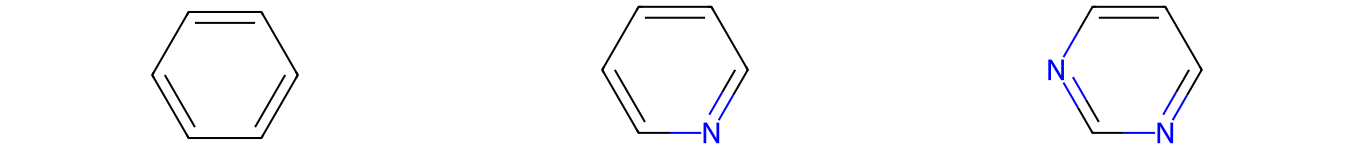

In [2]:
ms = [Chem.MolFromSmiles(smi) for smi in ('c1ccccc1','c1ncccc1','c1ncncc1')]
bndl = Chem.MolBundle()
for m in ms:
    bndl.AddMol(m)
bndl

### Molecule property display

If a molecule has properties associated with it, they will now by default be displayed with the molecule in the notebook:

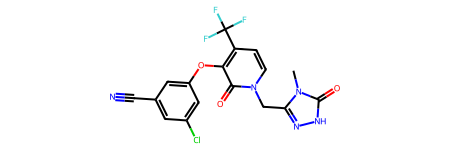

In [3]:
from rdkit.Chem import Descriptors
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
doravirine.SetProp('_Name','CHEMBL2364608')
doravirine.SetProp('USAN','Doravirine')
doravirine.SetDoubleProp('AMW',Descriptors.MolWt(doravirine))
doravirine.SetProp('Formula',Descriptors.rdMolDescriptors.CalcMolFormula(doravirine))
doravirine

There are times when this can be overwhelming (thanks to Paolo for the example):

{'PUBCHEM_COMPOUND_CID': 185460, 'PUBCHEM_COMPOUND_CANONICALIZED': 1, 'PUBCHEM_CACTVS_COMPLEXITY': 641, 'PUBCHEM_CACTVS_HBOND_ACCEPTOR': 5, 'PUBCHEM_CACTVS_HBOND_DONOR': 1, 'PUBCHEM_CACTVS_ROTATABLE_BOND': 10, 'PUBCHEM_CACTVS_SUBSKEYS': 'AAADcfB7MAAAAAAAAAAAAAAAAAAAAWAAAAA8YIAAAAAAAFgB9AAAHgAACAAADwjhnwYz2LcMFgCoAybybACCgC0hEqAJ2CE4dJiKaLLAnZGXYAhswAPYyCeYyOCPwAAAAAAAACCAAAAAAAAAQAAAAAAAAA==', 'PUBCHEM_IUPAC_OPENEYE_NAME': '2-[4-[2-[4-[1-(2-ethoxyethyl)benzimidazol-2-yl]-1-piperidyl]ethyl]phenyl]-2-methyl-propanoic acid', 'PUBCHEM_IUPAC_CAS_NAME': '2-[4-[2-[4-[1-(2-ethoxyethyl)-2-benzimidazolyl]-1-piperidinyl]ethyl]phenyl]-2-methylpropanoic acid', 'PUBCHEM_IUPAC_NAME_MARKUP': '2-[4-[2-[4-[1-(2-ethoxyethyl)benzimidazol-2-yl]piperidin-1-yl]ethyl]phenyl]-2-methylpropanoic acid', 'PUBCHEM_IUPAC_NAME': '2-[4-[2-[4-[1-(2-ethoxyethyl)benzimidazol-2-yl]piperidin-1-yl]ethyl]phenyl]-2-methylpropanoic acid', 'PUBCHEM_IUPAC_SYSTEMATIC_NAME': '2-[4-[2-[4-[1-(2-ethoxyethyl)benzimidazol-2-yl]piperidi

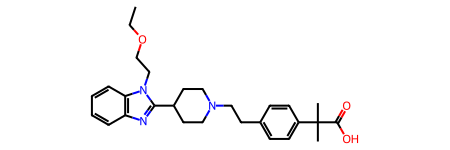

In [7]:
import requests
from io import BytesIO

bilastine_pubchem = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/CID/185460/record/SDF/?record_type=2d&response_type=save&response_basename=Structure2D_CID_185460'
response = requests.get(bilastine_pubchem, allow_redirects=True)
buf = BytesIO(response.content)
with Chem.ForwardSDMolSupplier(buf) as suppl:
    pcmol = next(suppl)
print(pcmol.GetPropsAsDict())
pcmol

You can change the maximum number of properties displayed:

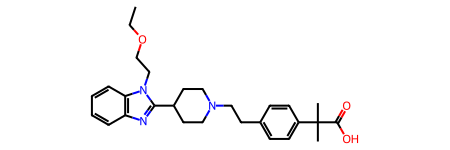

In [5]:
IPythonConsole.ipython_maxProperties = -1
pcmol

You can turn this rendering off completely if you want to:

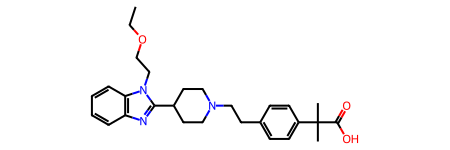

In [6]:
IPythonConsole.ipython_showProperties = False
pcmol

In [12]:
IPythonConsole.ipython_showProperties = True
IPythonConsole.ipython_maxProperties = 8


## Interactive Renderer
(2022.03 and 2022.09 releases)

Paolo will say more about these

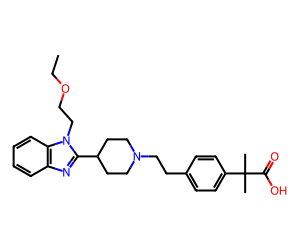

In [13]:
IPythonConsole.InteractiveRenderer.setEnabled()
pcmol

In [15]:
Draw.MolsToGridImage([pcmol,doravirine])

"<div style=""width: 200px; height: 200px; margin: auto;"" class=""rdk-str-rnr-mol-container"" id=""rdk-str-rnr-mol-a4e37a52-4955-11ed-ae1e-9cb6d0f86df1"" data-mol=""pkl_776t3gAAAAANAAAAAAAAAAEAAAAiAAAAJQAAAIABCAAgAAAAAggAaAAAAAMBAQgAKAAAAAMCBwAgAAAAAwdAKAAAAAMDB0AoAAAAAwMGAGAAAAADAQYAYAAAAAICBgBgAAAAAgIGAGAAAAACAgYAYAAAAAICBkAoAAAAAwQGAGAAAAACAgYAYAAAAAICBkAoAAAAAwQGAGAAAAACAgZAKAAAAAMEBkAoAAAAAwQGAGAAAAACAgZAaAAAAAMDAQZAaAAAAAMDAQZAaAAAAAMDAQZAaAAAAAMDAQZAKAAAAAMEBgAgAAAABAZAaAAAAAMDAQZAaAAAAAMDAQZAaAAAAAMDAQZAaAAAAAMDAQYAYAAAAAEDBgBgAAAAAQMGACgAAAADBAYAYAAAAAICBgBgAAAAAQMLABIAACAAAR8gAh8oAgMJAAMKAAMMAAQLaAwEDmgMBA8ABQtoDAUQaAwGBwAGCAAGCwAHCQAICgAMDQANEQAOEGgMDhNoDA8SABAUaAwRFWgMERZoDBMZaAwUGmgMFRtoDBYcaAwXGAAXG2gMFxxoDBgdABgeABgfABkaaAwgIQAUBAUECwUQDgYHCQMKCAYGExkaFBAOBhUbFxwWEReiAQAAAQAAAAAAAAAAIrU3lEC+wec/AAAAAL4wdEGoxlfAAAAAAL4wdEHc19G/AAAAAL4wBEHc19G/AAAAAKK0lUDmrlW/AAAAAKK0lUDGbRzAAAAAAHxhyEDc19G/AAAAAHxh2ECL/UW/AAAAAHxh2EAdWiDAAAAAAHxh+ECL/UW/AAAAAHxh+EAdWiDAAAAAAHxhqEDc19G/AAAAAL4wFEHc19G/AAAAAL4wHEEdWiDAAAAAABfZbkDc15G/AAAAABKln0CNKO09AAAAABfZbkDu6wjAAAAAAL4wLEEdWiDAAAAAAHRGikCDL1w/AAAAAItsN0C4ryO/AAAAAItsN0Du6yjAAAAAAL4wNEGoxlfAAAAAAL4wNEHc19G/AAAAAL4wTEEdWiDAAAAAAL4wXEEdWiDAAAAAAAAAAEDc15G/AAAAAAAAAEDu6wjAAAAAAL4wREGoxlfAAAAAAL4wREHc19G/AAAAAL4wXEEdWmDAAAAAAL4wXEE5tMC/AAAAAL4wbEEdWiDAAAAAAIqwfUB7gyNAAAAAAIbJiEAdWmBAAAAAABY="" data-content=""rdkit/molecule"" data-parent-node=""div[class*=jp-NotebookPanel-notebook]""/>","<div style=""width: 200px; height: 200px; margin: auto;"" class=""rdk-str-rnr-mol-container"" id=""rdk-str-rnr-mol-a4e3c869-4955-11ed-9f2a-9cb6d0f86df1"" data-mol=""pkl_776t3gAAAAANAAAAAAAAAAEAAAAdAAAAHwAAAIABBgBgAAAAAQMHQCgAAAADAwZAKAAAAAMEB0AoAAAAAwMHQDgAAAADAQMGQCgAAAADBAgAKAAAAAMCBgBgAAAAAgIHQCgAAAADAwZAaAAAAAMDAQZAaAAAAAMDAQZAKAAAAAMEBkAoAAAAAwQGQCgAAAADBAgAKAAAAAMCCAAoAAAAAwIGQCgAAAADBAZAaAAAAAMDAQZAKAAAAAMEBkBoAAAAAwMBBkAoAAAAAwQGQGgAAAADAwERACAAAAABBgAoAAAAAgQHACgAAAACAwYAIAAAAAQJACAAAAABCQAgAAAAAQkAIAAAAAELAAEAAQJoDAIDaAwDBGgMBAVoDAUGKAICBwAHCAAICWgMCQpoDAoLaAwLDGgMDA1oDA0OKAIMDyAPECAQEWgMERJoDBITaAwTFGgMFBVoDBQWABIXIBcYKAMLGQAZGgAZGwAZHAAFAWgMDQhoDBUQaAwUAwUBAgMEBQYJCgsMDQgGERITFBUQFwQAAAAAAAAAFg=="" data-content=""rdkit/molecule"" data-parent-node=""div[class*=jp-NotebookPanel-notebook]""/>"


,scaffold,ID,ROMol,S. aureus ATCC 29213 MIC (ug/mL)
0,1,,,NaN
1,NaN,1,,2
2,NaN,2,,2
3,NaN,3,,>128
4,NaN,4,,128
...,...,...,...,...
73,NaN,73,,>128
74,NaN,74,,32
75,NaN,75,,64
76,NaN,76,,128

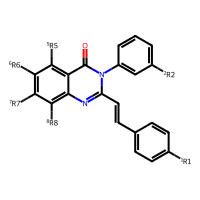
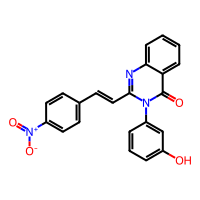
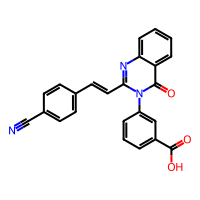
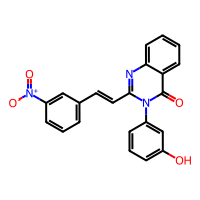
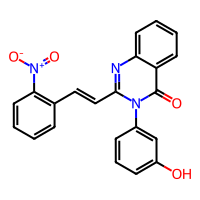
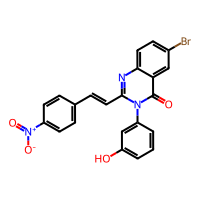
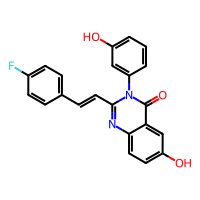
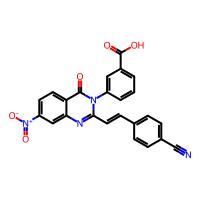
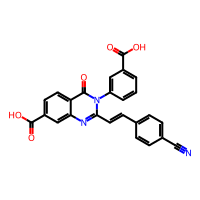
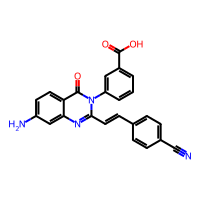

In [5]:
from rdkit.Chem import PandasTools
df = PandasTools.LoadSDF('./data/RGD_sets/data/jm6b00372.sdf')
df

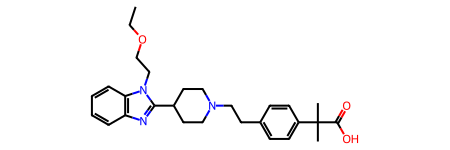

In [8]:
IPythonConsole.InteractiveRenderer.setEnabled(shouldEnable=False)
pcmol

## MolDraw2D improvements
(ongoing, this example shows features added for 2021.09, 2022.03, and 2022.09)

This is one area of the code which is being updated and tweaked in more or less every RDKit release.
Some recent major changes:
- (2022.03) a complete refactoring of the code to make it easier to extend and support
- (2022.03) addition of "flexicanvas" mode to allow the drawing code to set the output canvas size
- (2022.09) addition of ACS1996 mode along with a bunch of other small adjustments to get publication-ready output. (Funded by Glysade)



In [9]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
IPythonConsole.molSize = 300,250

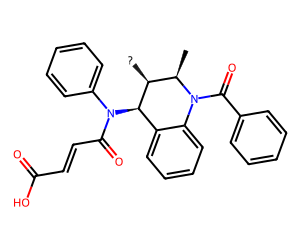

In [10]:
from rdkit import Chem
mol = Chem.MolFromSmiles('C[C@@H]1[C@H](*)[C@H](N(C(=O)/C=C/C(O)=O)C2=CC=CC=C2)C2=CC=CC=C2N1C(=O)C1=CC=CC=C1 |&1:1,4|')
mol

In [11]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
import ipywidgets as widgets
from ipywidgets import interact,fixed
from IPython.display import SVG,Image

@interact(mol=fixed(mol),)
def show_mol(mol,useSVG=True,addAtomIndices=False,addBondIndices=False,addStereoAnnotation=False,explicitMethyl=False,
         dummiesAreAttachments=False,blackAndWhite=False,darkMode=False,comicMode=False,ACS1996=False,flexiCanvas=False,
             minFontSize="4",maxFontSize="40",legend=""):
    if ACS1996:
        flexiCanvas=True
    if not flexiCanvas:
        w,h = 450,400
    else:
        w,h = -1,-1
        
    if useSVG:
        d = rdMolDraw2D.MolDraw2DSVG(w,h)
    else:
        d = rdMolDraw2D.MolDraw2DCairo(w,h)
    dos = d.drawOptions()
    dos.addAtomIndices=addAtomIndices
    dos.addBondIndices=addBondIndices
    dos.addStereoAnnotation = addStereoAnnotation
    dos.explicitMethyl = explicitMethyl
    dos.dummiesAreAttachments = dummiesAreAttachments
    dos.minFontSize = int(minFontSize)
    dos.maxFontSize = int(maxFontSize)
    if blackAndWhite:
        dos.useBWAtomPalette()
    if darkMode:
        rdMolDraw2D.SetDarkMode(d)
    if comicMode:
        Draw.SetComicMode(dos)
    if ACS1996:
        rdDepictor.Compute2DCoords(mol)
        rdMolDraw2D.PrepareMolForDrawing(mol)
        rdMolDraw2D.DrawMoleculeACS1996(d,mol,legend=legend)
    else:
        d.DrawMolecule(mol,legend=legend)
    d.FinishDrawing()
    if useSVG:
        return SVG(d.GetDrawingText())
    else:
        return Image(d.GetDrawingText())

interactive(children=(Checkbox(value=True, description='useSVG'), Checkbox(value=False, description='addAtomIn…

## Partial deserialization
(2021.09 release)

Loading molecules from pickles is pretty fast, but when speed is critical and you don't need things like conformers or stored properties you can now skip parts of the deserialization process

In [13]:
# read in a set of molecules:
mols = [x for x in Chem.ForwardSDMolSupplier('./data/RGD_sets/data/jm6b01356.sdf')]

mols += mols
# each molecule has a conformer (it came from an SDF),
# add a couple of properties to them:
for m in mols:
    m.SetIntProp('NumAtoms',m.GetNumAtoms())
    m.SetIntProp('NumBonds',m.GetNumBonds())
pkls = [m.ToBinary() for m in mols]
len(pkls)

262

In [14]:
%timeit tmp = [Chem.Mol(x) for x in pkls]

11.1 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
%timeit tmp = [Chem.Mol(x,Chem.PropertyPickleOptions.NoProps | \
                        Chem.PropertyPickleOptions.NoConformers) \
                for x in pkls]

9.53 ms ± 878 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


What about a molecule with a bunch of properties?

In [23]:
len(pcmol.GetPropsAsDict())

34

In [24]:
pcpkls = [pcmol.ToBinary(Chem.PropertyPickleOptions.AllProps)]*1000

In [25]:
%timeit tmp = [Chem.Mol(x) for x in pcpkls]

66.4 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%timeit tmp = [Chem.Mol(x,Chem.PropertyPickleOptions.NoProps |\
                        Chem.PropertyPickleOptions.NoConformers) \
                for x in pcpkls]

25.4 ms ± 510 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## MolStandardize improvements
(2021.09 release)

There have been a number of improvements to the `rdMolStandardize` functionality:

1. The default parameters are now built-in, i.e. the default parameter files are no longer needed or used.
2. Parameters can be provided as JSON.
3. The API has been "completed": several missing functions have been added

Here's a silly example

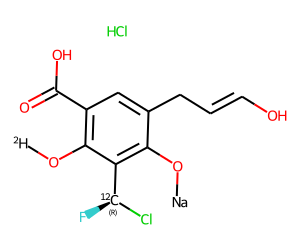

In [37]:
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit import RDLogger
# the standardization code is verbose... disable that
RDLogger.DisableLog('rdApp.info')
msm1 = Chem.MolFromSmiles('[Na]Oc1c([12C@H](F)Cl)c(O[2H])c(C(=O)O)cc1CC=CO.Cl')
msm1

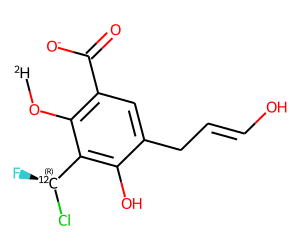

In [38]:
rdMolStandardize.FragmentParent(msm1)

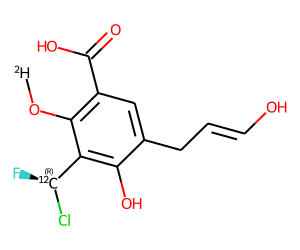

In [39]:
rdMolStandardize.ChargeParent(rdMolStandardize.FragmentParent(msm1))

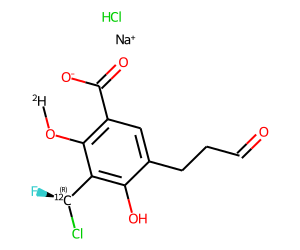

In [40]:
rdMolStandardize.TautomerParent(msm1)

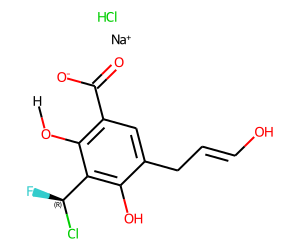

In [41]:
rdMolStandardize.IsotopeParent(msm1)

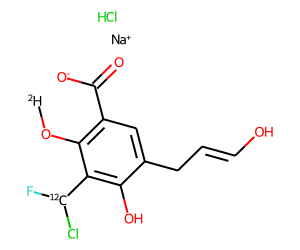

In [42]:
rdMolStandardize.StereoParent(msm1)

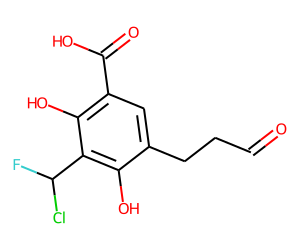

In [43]:
rdMolStandardize.SuperParent(msm1)

In [44]:
RDLogger.EnableLog('rdApp.info')


## SubstructLibrary improvements
(2021.09 and 2022.03)

The SubstructLibrary now supports:
- setting the search order
- tautomer and molbundle queries
- using `SubstructMatchParameters`

**NOTE:** this section of the notebook does not work in binder.


In [8]:
import time
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdSubstructLibrary

In [16]:
import pickle
with open('./data/demo_ssslib.pkl','rb') as inf:
    slib = pickle.load(inf)

1000 results


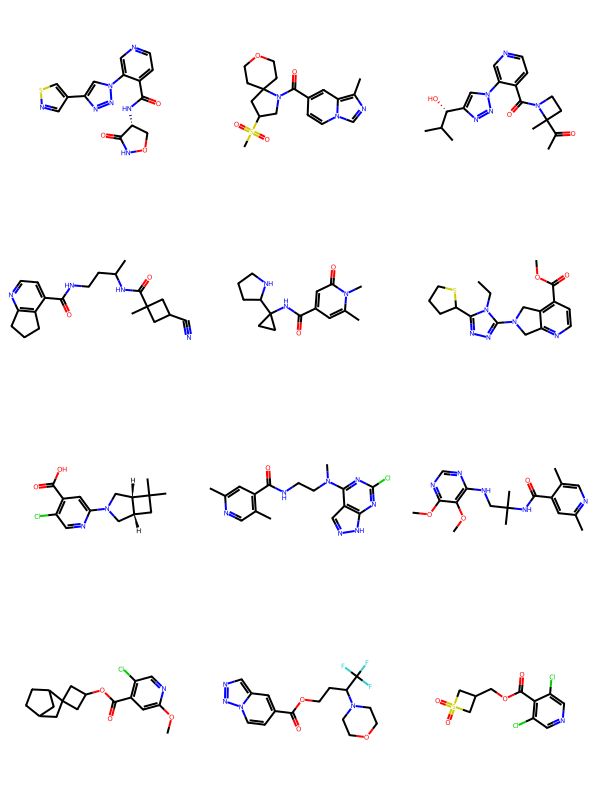

In [11]:
mids = slib.GetMatches(Chem.MolFromSmarts('[O,N]=Cc1ccncc1'))
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

We can change the search order:

1000 results


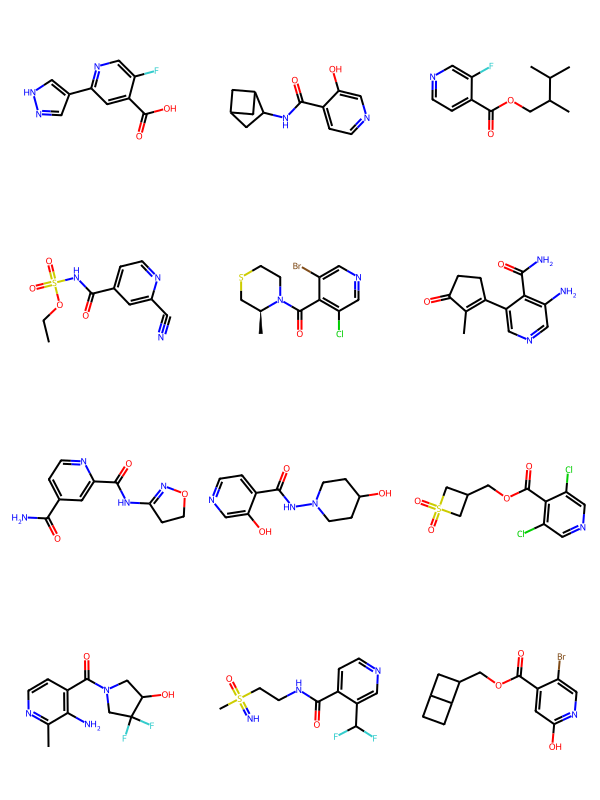

In [12]:
holder = slib.GetMolHolder()
nats = sorted([(holder.GetMol(x).GetNumAtoms(),x) for x in range(len(slib))])
order = [y for x,y in nats]
slib.SetSearchOrder(order)
mids = slib.GetMatches(Chem.MolFromSmarts('[O,N]=Cc1ccncc1'))
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

This also allows us to limit where we search.

In this example I just do the search across molecules which have less than 17 atoms

3 results


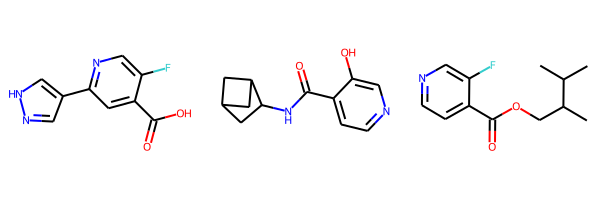

In [49]:
order = [y for x,y in nats if x<17]
slib.SetSearchOrder(order)
mids = slib.GetMatches(Chem.MolFromSmarts('[O,N]=Cc1ccncc1'))
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

We can also search with a MolBundle:

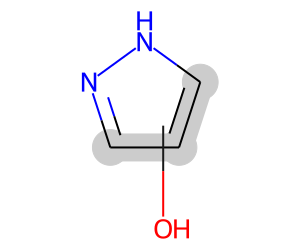

In [50]:
qry = Chem.MolFromMolBlock('''
  Mrv2108 10072115572D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 6 0 0 0
M  V30 BEGIN ATOM
M  V30 1 N -1.9167 -4.815 0 0
M  V30 2 N -3.1625 -5.7202 0 0
M  V30 3 C -2.6867 -7.1848 0 0
M  V30 4 C -1.1467 -7.1848 0 0
M  V30 5 C -0.6708 -5.7202 0 0
M  V30 6 * -1.5014 -6.6966 0 0
M  V30 7 O -1.5014 -9.0066 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 3 4
M  V30 3 1 1 5
M  V30 4 2 2 3
M  V30 5 2 4 5
M  V30 6 1 6 7 ENDPTS=(3 3 4 5) ATTACH=ANY
M  V30 END BOND
M  V30 END CTAB
M  END
''')
qry

In [51]:
from rdkit.Chem import rdMolEnumerator
qbndl = rdMolEnumerator.Enumerate(qry)

26 results


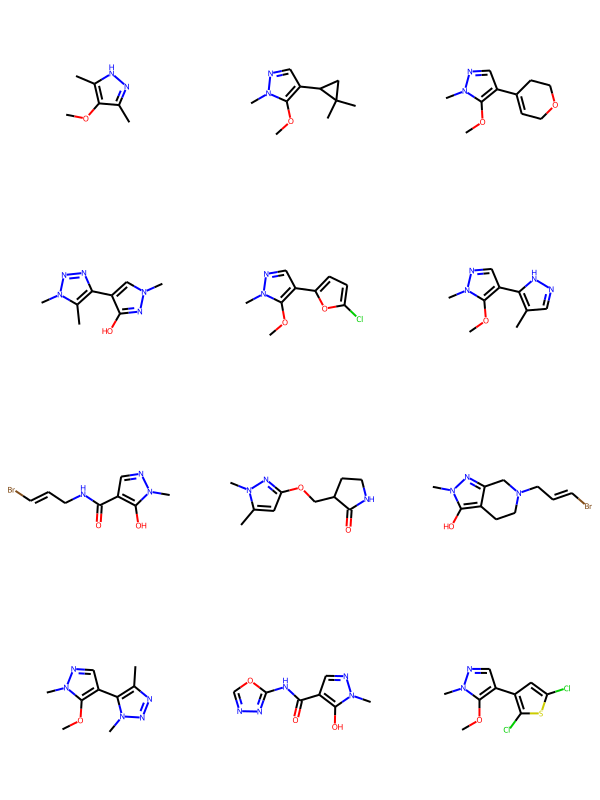

In [52]:
mids = slib.GetMatches(qbndl)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

Tautomer queries work as well:

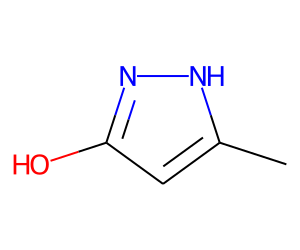

In [53]:
qmol = Chem.MolFromSmiles('Cc1[nH]nc(O)c1')
qmol

2 results


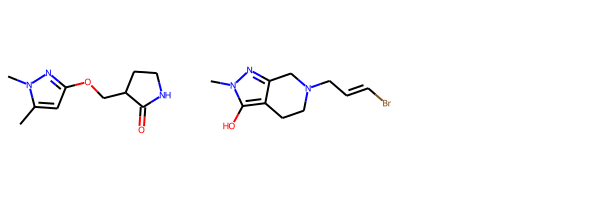

In [54]:
mids = slib.GetMatches(qmol)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

4 results


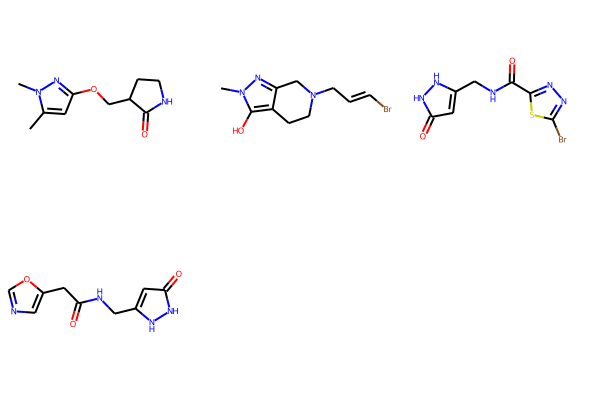

In [55]:
from rdkit.Chem import rdTautomerQuery
tq = rdTautomerQuery.TautomerQuery(qmol)
mids = slib.GetMatches(tq)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

Using SubstructMatchParameters:

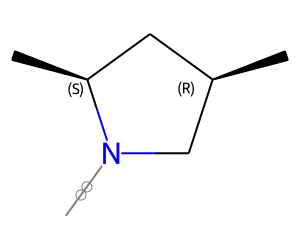

In [56]:
qmol = Chem.MolFromMolBlock('''
  Mrv2108 10072116132D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 8 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -1.4583 0.2267 0 0
M  V30 2 C -2.7042 -0.6786 0 0 CFG=1
M  V30 3 N -2.2283 -2.1431 0 0
M  V30 4 C -0.6883 -2.1431 0 0
M  V30 5 C -0.2125 -0.6786 0 0 CFG=2
M  V30 6 C -4.1688 -0.2027 0 0
M  V30 7 C 1.2522 -0.2027 0 0
M  V30 8 C -3.1335 -3.389 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 3 4
M  V30 4 1 4 5
M  V30 5 1 1 5
M  V30 6 1 2 6 CFG=1
M  V30 7 1 5 7 CFG=1
M  V30 8 1 3 8 TOPO=2
M  V30 END BOND
M  V30 END CTAB
M  END
''')
qmol

19 results


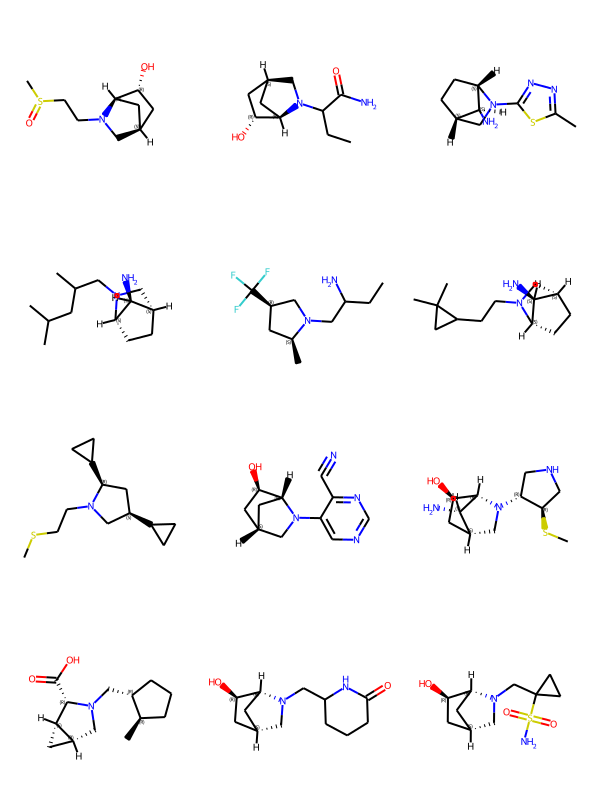

In [57]:
mids = slib.GetMatches(qmol)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

119 results


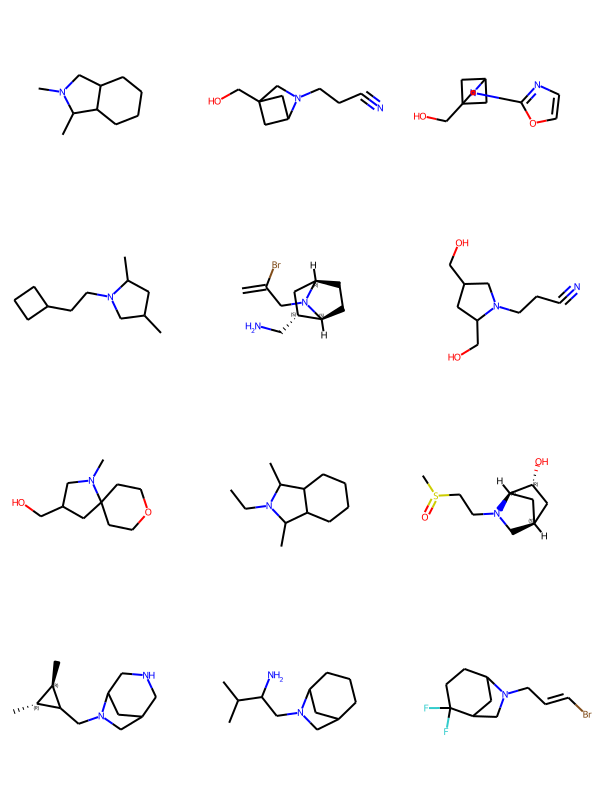

In [58]:
ps = Chem.SubstructMatchParameters()
ps.useChirality = False
mids = slib.GetMatches(qmol,ps)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:12]]
Draw.MolsToGridImage(ms)

In [59]:
IPythonConsole.ipython_showProperties = True
IPythonConsole.ipython_maxProperties = 10

## MolEnumerator
(initial release with 2020.09)

Enumerating features from Mol files

This is an initial implementation, more features will be added in future releases.

Currently supported:
- Position variation bonds (2020.09)
- Link nodes (2020.09)
- SRUs (2021.09)

In [96]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
IPythonConsole.molSize = 300,250

### SRUs
(2021.09 release)

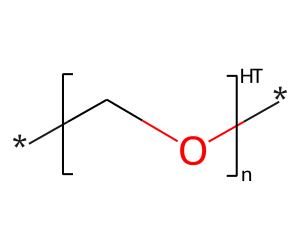

In [102]:
sru_mol = Chem.MolFromMolBlock('''
  ACCLDraw05132106232D

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 4 3 1 0 0
M  V30 BEGIN ATOM
M  V30 1 C 9.7578 -7.0211 0 0 
M  V30 2 O 10.7757 -7.6201 0 0 
M  V30 3 * 11.8037 -7.0378 0 0 
M  V30 4 * 8.7298 -7.6034 0 0 
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2 
M  V30 2 1 2 3 
M  V30 3 1 1 4 
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 1 ATOMS=(2 2 1) XBONDS=(2 3 2) BRKXYZ=(9 9.24 -7.9 0 9.24 -6.72 -
M  V30 0 0 0 0) BRKXYZ=(9 11.29 -6.74 0 11.29 -7.92 0 0 0 0) CONNECT=HT -
M  V30 LABEL=n 
M  V30 END SGROUP
M  V30 END CTAB
M  END''')
sru_mol

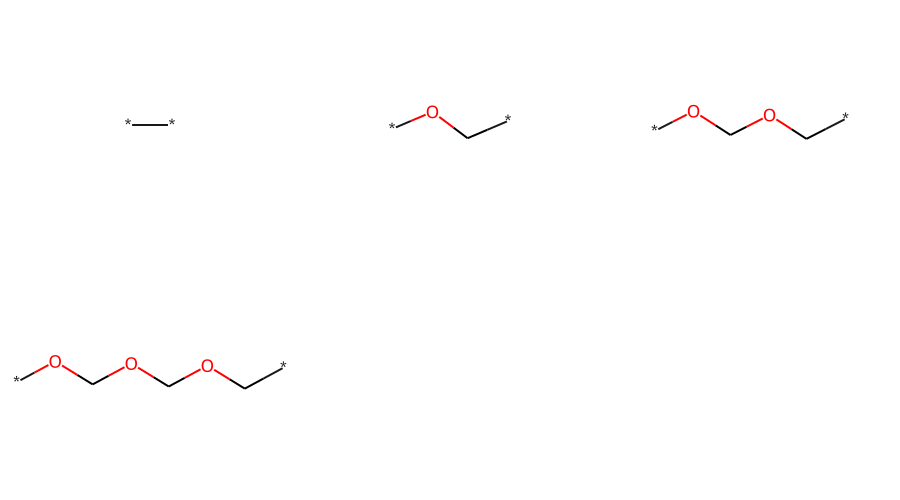

In [103]:
bndl = rdMolEnumerator.Enumerate(sru_mol)
for m in bndl:
    rdDepictor.Compute2DCoords(m)
bndl

We also support head-to-head enumeration:

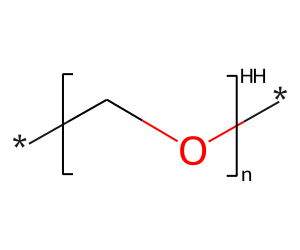

In [104]:
sru_mol = Chem.MolFromMolBlock('''
  ACCLDraw05132106232D

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 4 3 1 0 0
M  V30 BEGIN ATOM
M  V30 1 C 9.7578 -7.0211 0 0 
M  V30 2 O 10.7757 -7.6201 0 0 
M  V30 3 * 11.8037 -7.0378 0 0 
M  V30 4 * 8.7298 -7.6034 0 0 
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2 
M  V30 2 1 2 3 
M  V30 3 1 1 4 
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 1 ATOMS=(2 2 1) XBONDS=(2 3 2) BRKXYZ=(9 9.24 -7.9 0 9.24 -6.72 -
M  V30 0 0 0 0) BRKXYZ=(9 11.29 -6.74 0 11.29 -7.92 0 0 0 0) CONNECT=HH -
M  V30 LABEL=n 
M  V30 END SGROUP
M  V30 END CTAB
M  END''')
sru_mol

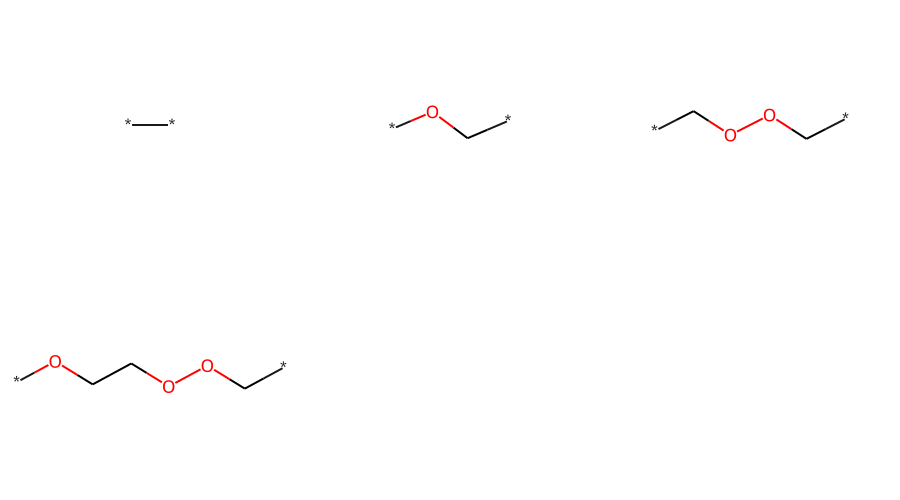

In [105]:
bndl = rdMolEnumerator.Enumerate(sru_mol)
for m in bndl:
    rdDepictor.Compute2DCoords(m)
bndl

And non-overlapping co-polymers

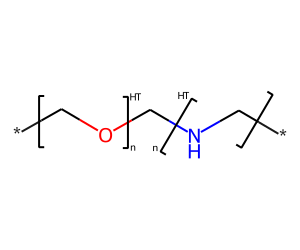

In [106]:
sru_mol = Chem.MolFromMolBlock('''
  Mrv2108 09232105582D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 6 2 0 0
M  V30 BEGIN ATOM
M  V30 1 C 12.719 -9.1518 0 0
M  V30 2 O 14.0458 -9.9326 0 0
M  V30 3 C 15.3857 -9.1735 0 0 
M  V30 4 * 11.379 -9.9108 0 0
M  V30 5 N 16.713 -9.9545 0 0
M  V30 6 C 18.053 -9.1955 0 0
M  V30 7 * 19.3803 -9.9764 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 1 4
M  V30 4 1 3 5
M  V30 5 1 5 6
M  V30 6 1 6 7
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 0 ATOMS=(2 2 1) XBONDS=(2 2 3) BRKXYZ=(9 12.044 -10.2974 0 -
M  V30 12.044 -8.7593 0 0 0 0) BRKXYZ=(9 14.7161 -8.7854 0 14.7161 -10.3235 0 -
M  V30 0 0 0) CONNECT=HT LABEL=n
M  V30 2 SRU 0 ATOMS=(2 5 6) XBONDS=(2 4 6) BRKXYZ=(9 19.0681 -8.7207 0 -
M  V30 18.131 -10.3134 0 0 0 0) BRKXYZ=(9 15.6979 -10.4293 0 16.6351 -8.8365 -
M  V30 0 0 0 0) CONNECT=HT LABEL=n
M  V30 END SGROUP
M  V30 END CTAB
M  END
''')
sru_mol

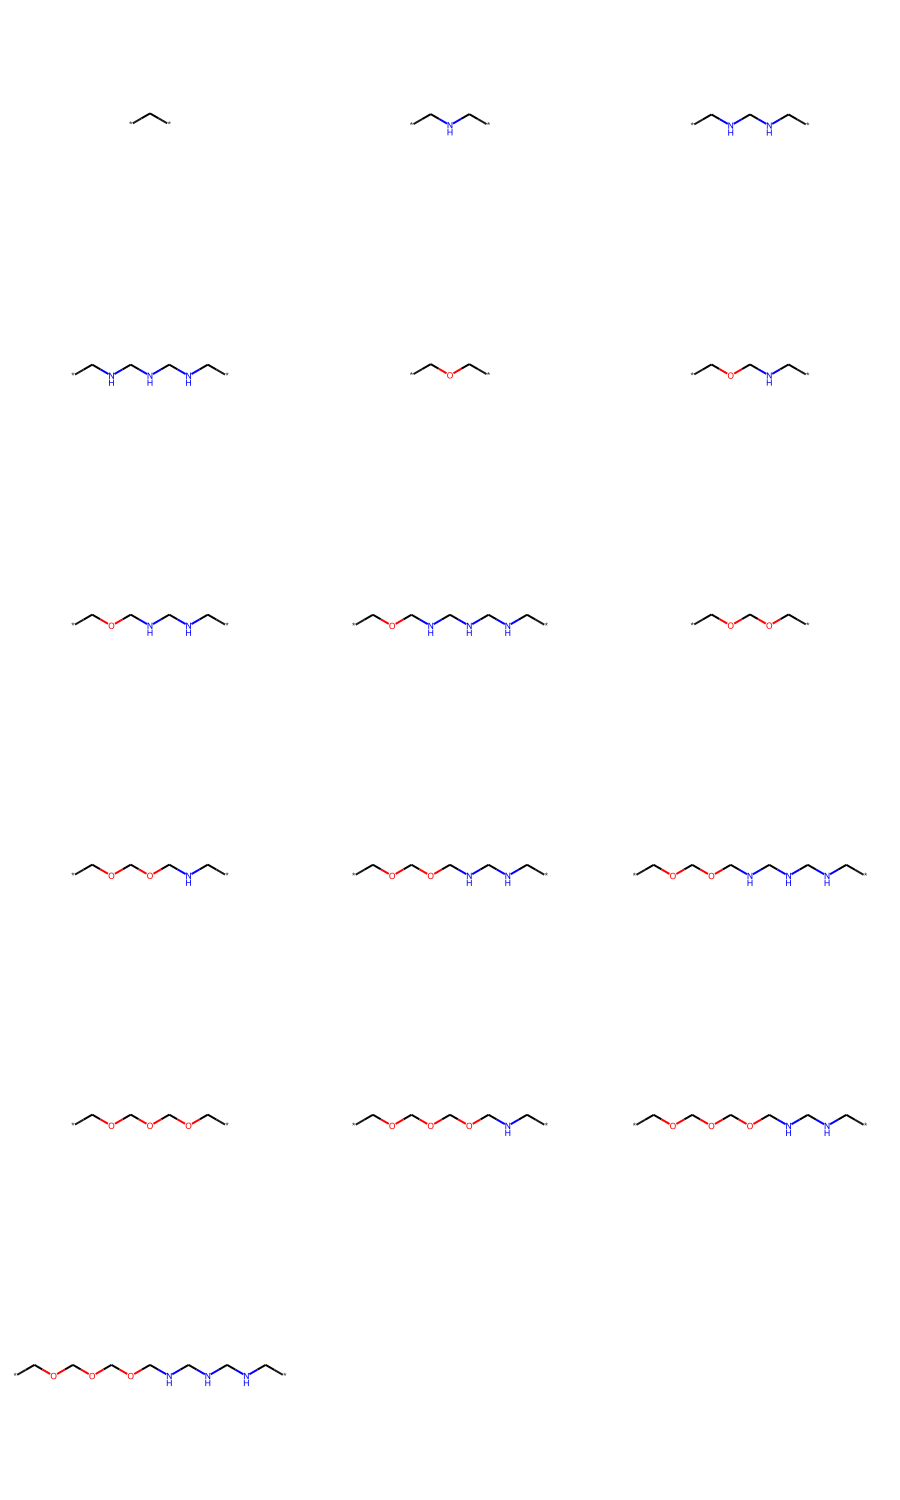

In [107]:
bndl = rdMolEnumerator.Enumerate(sru_mol)
for m in bndl:
    rdDepictor.Compute2DCoords(m)
bndl

But nested/overlapping SRUs are not currently supported:

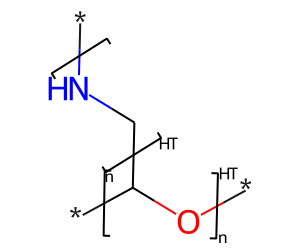

In [108]:
fail_mol = Chem.MolFromMolBlock('''
  ACCLDraw05132106342D

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 6 2 0 0
M  V30 BEGIN ATOM
M  V30 1 * 9.2115 -7.4169 0 0 
M  V30 2 C 10.2483 -6.8511 0 0 CFG=3 
M  V30 3 C 10.2767 -5.67 0 0 
M  V30 4 O 11.257 -7.4662 0 0 
M  V30 5 * 12.2941 -6.9003 0 0 
M  V30 6 N 9.268 -5.0548 0 0 CFG=3 
M  V30 7 * 9.2964 -3.8737 0 0 
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2 
M  V30 2 1 2 3 
M  V30 3 1 2 4 
M  V30 4 1 4 5 
M  V30 5 1 3 6 
M  V30 6 1 6 7 
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 1 ATOMS=(5 3 2 4 6 7) XBONDS=(2 1 4) BRKXYZ=(9 9.72 -7.72 0 9.74 -
M  V30 -6.54 0 0 0 0) BRKXYZ=(9 11.79 -6.59 0 11.76 -7.77 0 0 0 0) -
M  V30 CONNECT=HT LABEL=n 
M  V30 2 SRU 2 ATOMS=(2 3 6) XBONDS=(2 6 2) BRKXYZ=(9 8.78 -4.78 0 9.78 -4.15 -
M  V30 0 0 0 0) BRKXYZ=(9 10.76 -5.95 0 9.76 -6.57 0 0 0 0) CONNECT=HT -
M  V30 LABEL=n 
M  V30 END SGROUP
M  V30 END CTAB
M  END''')
fail_mol

In [109]:
bndl = rdMolEnumerator.Enumerate(fail_mol)


ValueError: cannot enumerate overlapping SRU groups

## Registration Hash
(2022.09 release)

Dan will say more about this later too

### Tautomers

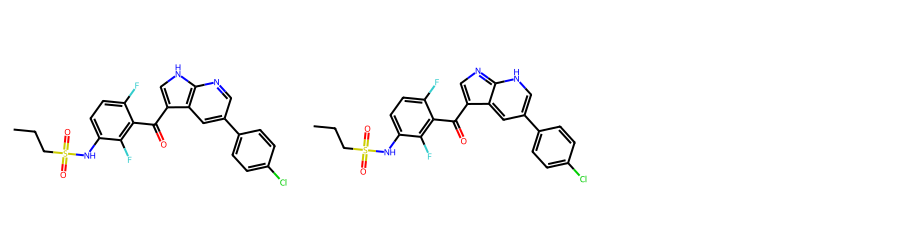

In [31]:
vemurafenib = Chem.MolFromSmiles('CCCS(=O)(=O)Nc1ccc(F)c(c1F)C(=O)c2c[nH]c3c2cc(cn3)c4ccc(Cl)cc4')
vemurafenib_taut = Chem.MolFromSmiles('CCCS(=O)(=O)Nc1ccc(F)c(c1F)C(=O)c2cnc3c2cc(c[nH]3)c4ccc(Cl)cc4')
Draw.MolsToGridImage([vemurafenib,vemurafenib_taut],subImgSize=(300,250))

In [32]:
from rdkit.Chem import RegistrationHash
def compare_layers(mol1,mol2):
    h1 = RegistrationHash.GetMolLayers(mol1)
    h2 = RegistrationHash.GetMolLayers(mol2)
    for k in h1:
        if h1[k] and h1[k] != '[]' and h1[k] == h2[k]:
            print(f'{k}:\n {h1[k]}\n {h2[k]}')
def show_differing_layers(mol1,mol2):
    h1 = RegistrationHash.GetMolLayers(mol1)
    h2 = RegistrationHash.GetMolLayers(mol2)
    for k in h1:
        if h1[k] != h2[k]:
            print(f'{k}:\n {h1[k]}\n {h2[k]}')


In [33]:
RegistrationHash.GetMolLayers(vemurafenib)

{<HashLayer.CANONICAL_SMILES: 1>: 'CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc(Cl)cc4)cc23)c1F',
 <HashLayer.ESCAPE: 2>: '',
 <HashLayer.FORMULA: 3>: 'C23H18ClF2N3O3S',
 <HashLayer.NO_STEREO_SMILES: 4>: 'CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc(Cl)cc4)cc23)c1F',
 <HashLayer.NO_STEREO_TAUTOMER_HASH: 5>: 'CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0',
 <HashLayer.SGROUP_DATA: 6>: '[]',
 <HashLayer.TAUTOMER_HASH: 7>: 'CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0'}

In [40]:
compare_layers(vemurafenib,vemurafenib_taut)

HashLayer.FORMULA:
 C23H18ClF2N3O3S
 C23H18ClF2N3O3S
HashLayer.NO_STEREO_TAUTOMER_HASH:
 CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0
 CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0
HashLayer.TAUTOMER_HASH:
 CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0
 CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0


### Polymers

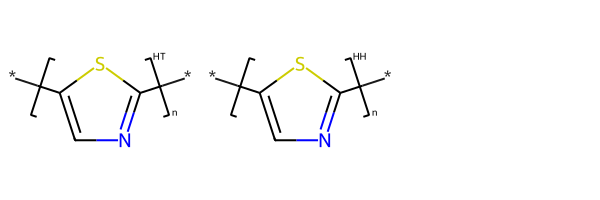

In [43]:
ht_polymer = Chem.MolFromMolBlock('''
  Mrv2102 10112211072D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 7 1 0 0
M  V30 BEGIN ATOM
M  V30 1 S -2.875 -1.1483 0 0
M  V30 2 C -4.1209 -2.0536 0 0
M  V30 3 C -3.645 -3.5181 0 0
M  V30 4 N -2.105 -3.5181 0 0
M  V30 5 C -1.6291 -2.0536 0 0
M  V30 6 * -5.5855 -1.5777 0 0
M  V30 7 * -0.1645 -1.5777 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 3 4
M  V30 3 1 1 5
M  V30 4 2 2 3
M  V30 5 2 4 5
M  V30 6 1 2 6
M  V30 7 1 5 7
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 0 ATOMS=(5 2 3 4 1 5) XBONDS=(2 6 7) BRKXYZ=(9 -1.3116 -0.9788 0 -
M  V30 -0.7405 -2.7364 0 0 0 0) BRKXYZ=(9 -5.0095 -2.7364 0 -4.4384 -0.9788 0 -
M  V30 0 0 0) CONNECT=HT LABEL=n
M  V30 END SGROUP
M  V30 END CTAB
M  END
''')
hh_polymer = Chem.MolFromMolBlock('''
  Mrv2102 10112211072D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 7 1 0 0
M  V30 BEGIN ATOM
M  V30 1 S -2.875 -1.1483 0 0
M  V30 2 C -4.1209 -2.0536 0 0
M  V30 3 C -3.645 -3.5181 0 0
M  V30 4 N -2.105 -3.5181 0 0
M  V30 5 C -1.6291 -2.0536 0 0
M  V30 6 * -5.5855 -1.5777 0 0
M  V30 7 * -0.1645 -1.5777 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 3 4
M  V30 3 1 1 5
M  V30 4 2 2 3
M  V30 5 2 4 5
M  V30 6 1 2 6
M  V30 7 1 5 7
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 0 ATOMS=(5 2 3 4 1 5) XBONDS=(2 6 7) BRKXYZ=(9 -1.3116 -0.9788 0 -
M  V30 -0.7405 -2.7364 0 0 0 0) BRKXYZ=(9 -5.0095 -2.7364 0 -4.4384 -0.9788 0 -
M  V30 0 0 0) CONNECT=HH LABEL=n
M  V30 END SGROUP
M  V30 END CTAB
M  END
''')
Draw.MolsToGridImage([ht_polymer,hh_polymer])

In [47]:
show_differing_layers(ht_polymer,hh_polymer)

HashLayer.SGROUP_DATA:
 [{"type": "SRU", "atoms": [1, 2, 3, 4, 6], "bonds": [[0, 1], [4, 5]], "index": 1, "connect": "HT", "label": "n"}]
 [{"type": "SRU", "atoms": [1, 2, 3, 4, 6], "bonds": [[0, 1], [4, 5]], "index": 1, "connect": "HH", "label": "n"}]


### Stereochemistry

In [48]:
ss_ethambutol = Chem.MolFromSmiles('CC[C@@H](CO)NCCN[C@@H](CC)CO')
rr_ethambutol = Chem.MolFromSmiles('CC[C@H](CO)NCCN[C@H](CC)CO')
and_ethambutol = Chem.MolFromSmiles('CC[C@@H](CO)NCCN[C@@H](CC)CO |&1:2,9|')
or_ethambutol = Chem.MolFromSmiles('CC[C@@H](CO)NCCN[C@@H](CC)CO |o1:2,9|')
and_ethambutol2 = Chem.MolFromSmiles('CC[C@H](CO)NCCN[C@H](CC)CO |&1:2,9|')


In [51]:
compare_layers(ss_ethambutol,rr_ethambutol)

HashLayer.FORMULA:
 C10H24N2O2
 C10H24N2O2
HashLayer.NO_STEREO_SMILES:
 CCC(CO)NCCNC(CC)CO
 CCC(CO)NCCNC(CC)CO
HashLayer.NO_STEREO_TAUTOMER_HASH:
 CCC(C[O])[N]CC[N]C(CC)C[O]_4_0
 CCC(C[O])[N]CC[N]C(CC)C[O]_4_0


In [56]:
show_differing_layers(ss_ethambutol,rr_ethambutol)

HashLayer.CANONICAL_SMILES:
 CC[C@@H](CO)NCCN[C@@H](CC)CO
 CC[C@H](CO)NCCN[C@H](CC)CO
HashLayer.TAUTOMER_HASH:
 CC[C@@H](C[O])[N]CC[N][C@@H](CC)C[O]_4_0
 CC[C@H](C[O])[N]CC[N][C@H](CC)C[O]_4_0


In [55]:
show_differing_layers(ss_ethambutol,and_ethambutol)

HashLayer.CANONICAL_SMILES:
 CC[C@@H](CO)NCCN[C@@H](CC)CO
 CC[C@@H](CO)NCCN[C@@H](CC)CO |&1:2,9|
HashLayer.TAUTOMER_HASH:
 CC[C@@H](C[O])[N]CC[N][C@@H](CC)C[O]_4_0
 CC[C@@H](C[O])[N]CC[N][C@@H](CC)C[O]_4_0 |&1:2,9|


In [53]:
show_differing_layers(and_ethambutol,and_ethambutol2)

In [54]:
show_differing_layers(or_ethambutol,and_ethambutol)

HashLayer.CANONICAL_SMILES:
 CC[C@@H](CO)NCCN[C@@H](CC)CO |o1:2,9|
 CC[C@@H](CO)NCCN[C@@H](CC)CO |&1:2,9|
HashLayer.TAUTOMER_HASH:
 CC[C@@H](C[O])[N]CC[N][C@@H](CC)C[O]_4_0 |o1:2,9|
 CC[C@@H](C[O])[N]CC[N][C@@H](CC)C[O]_4_0 |&1:2,9|


## Beilstein generics
(2022.03 release)

Supported generics (from the RDKit book):
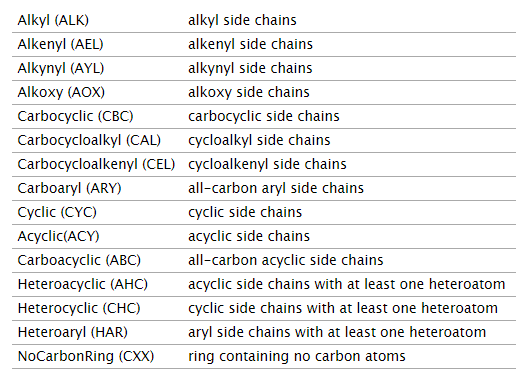



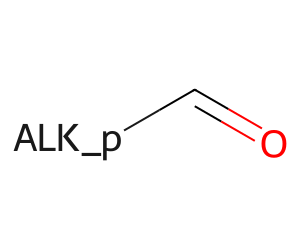

In [24]:
q = Chem.MolFromSmarts('O=C-* |$;;ALK_p$|')
q

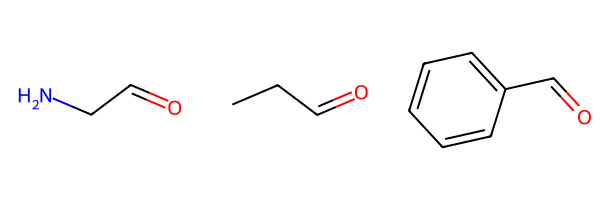

In [25]:
ms = [Chem.MolFromSmiles(x) for x in ('O=CCN','CCC=O','c1ccccc1C=O')]
Draw.MolsToGridImage(ms)

In [26]:
[m.HasSubstructMatch(q) for m in ms]

[True, True, True]

In [27]:
Chem.SetGenericQueriesFromProperties(q)
ps = Chem.SubstructMatchParameters()
ps.useGenericMatchers = True
[m.HasSubstructMatch(q,ps) for m in ms]

[False, True, False]

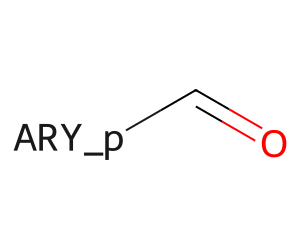

In [28]:
q = Chem.MolFromSmarts('O=C-* |$;;ARY_p$|')
q

In [29]:
Chem.SetGenericQueriesFromProperties(q)
ps = Chem.SubstructMatchParameters()
ps.useGenericMatchers = True
[m.HasSubstructMatch(q,ps) for m in ms]

[False, False, True]

1000 results


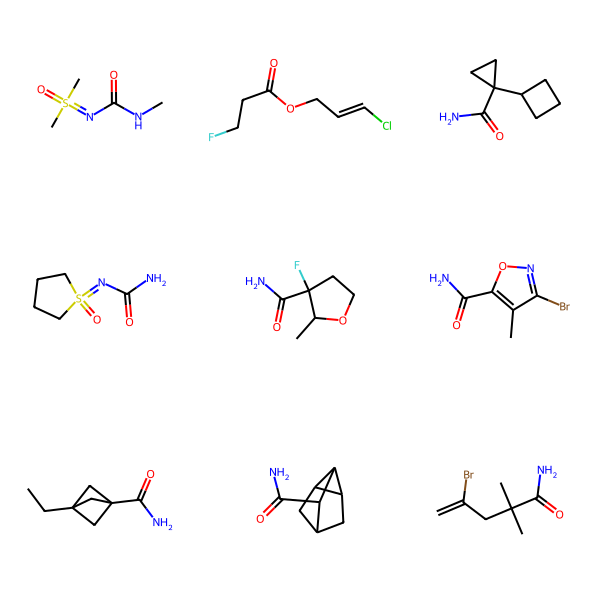

In [23]:
mids = slib.GetMatches(q)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:9]]
Draw.MolsToGridImage(ms)

1000 results


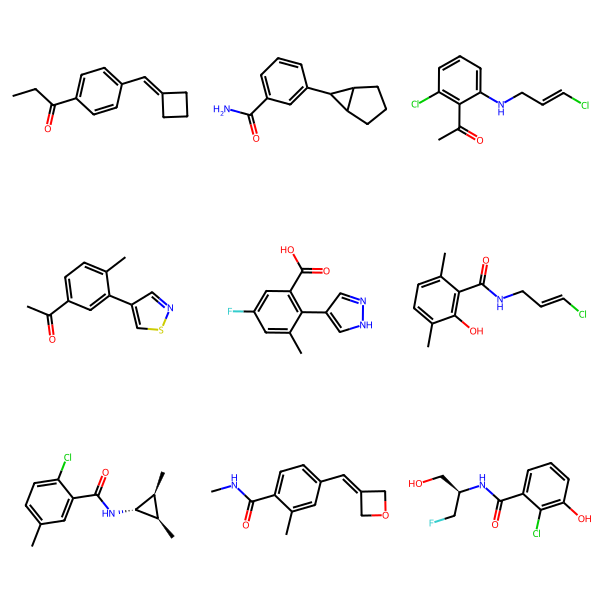

In [24]:
mids = slib.GetMatches(q,ps)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:9]]
Draw.MolsToGridImage(ms)

## xyz2mol integration

In [79]:
!cat ./data/dsgdb9nsd_107313.xyz

19
gdb 107313	2.67642	1.59305	1.14971	3.3443	81.12	-0.2359	-0.0506	0.1853	1106.1507	0.159794	-385.918216	-385.909962	-385.909018	-385.950934	31.892	
C	 0.0645055554	 1.4843171326	 0.3723315122	-0.379845
C	-0.001915467	 0.0516984051	-0.1729357038	-0.277772
C	-1.4001624807	-0.5304376801	-0.1487075838	 0.233551
C	-1.9909553844	-1.0379429662	 1.1601625215	-0.307513
C	-1.7182271444	-1.9962888369	 0.0152208454	-0.158294
C	-2.905416575	-2.2627721735	-0.8489696604	-0.065615
C	-3.3347497536	-1.1525477782	-1.4661914556	-0.191532
C	-2.4353480328	-0.0114763902	-1.1388331005	 0.336742
O	-2.4853518918	 1.1093228549	-1.595794586	-0.340877
H	 1.0876615149	 1.8699729825	 0.3263064541	 0.106173
H	-0.5836533924	 2.142053447	-0.2101812431	 0.152698
H	-0.2626541721	 1.5210712578	 1.4170099662	 0.108877
H	 0.3710335675	 0.0343653078	-1.2041622283	 0.107526
H	 0.662791197	-0.6008609283	 0.4071642198	 0.091428
H	-1.3142481944	-1.0584396879	 2.0096409673	 0.122076
H	-3.0252533013	-0.8199288984	 1.4038330438	 0

In [3]:
# the XYZ files from QM9 aren't really XYZ... clean them up:
def cleanup_qm9_xyz(fname):
    ind = open(fname).readlines()
    nAts = int(ind[0])
    smi = ind[-2].split()[-1]
    ind[1] = '\n'
    ind = ind[:nAts+2]
    for i in range(2,nAts+2):
        l = ind[i]
        l = l.split('\t')
        l.pop(-1)
        ind[i] = '\t'.join(l)+'\n'
    ind = ''.join(ind)
    return ind,smi

In [4]:
ind,smi = cleanup_qm9_xyz('./data/dsgdb9nsd_107313.xyz')
print(ind)

19

C	 0.0645055554	 1.4843171326	 0.3723315122
C	-0.001915467	 0.0516984051	-0.1729357038
C	-1.4001624807	-0.5304376801	-0.1487075838
C	-1.9909553844	-1.0379429662	 1.1601625215
C	-1.7182271444	-1.9962888369	 0.0152208454
C	-2.905416575	-2.2627721735	-0.8489696604
C	-3.3347497536	-1.1525477782	-1.4661914556
C	-2.4353480328	-0.0114763902	-1.1388331005
O	-2.4853518918	 1.1093228549	-1.595794586
H	 1.0876615149	 1.8699729825	 0.3263064541
H	-0.5836533924	 2.142053447	-0.2101812431
H	-0.2626541721	 1.5210712578	 1.4170099662
H	 0.3710335675	 0.0343653078	-1.2041622283
H	 0.662791197	-0.6008609283	 0.4071642198
H	-1.3142481944	-1.0584396879	 2.0096409673
H	-3.0252533013	-0.8199288984	 1.4038330438
H	-0.9412329872	-2.7436632889	 0.1278385726
H	-3.37329736	-3.2394582332	-0.9072563749
H	-4.2004762777	-1.0463782959	-2.1061677066



In [5]:
IPythonConsole.ipython_3d = True
raw_mol = Chem.MolFromXYZBlock(ind)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

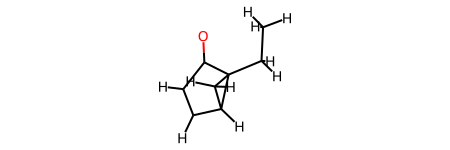

In [7]:
from rdkit.Chem import rdDetermineBonds
conn_mol = Chem.Mol(raw_mol)
rdDetermineBonds.DetermineConnectivity(conn_mol)
conn_mol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

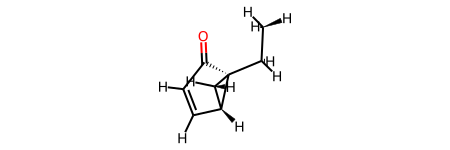

In [8]:
bond_moll = Chem.Mol(raw_mol)
rdDetermineBonds.DetermineBonds(bond_moll,charge=0)
bond_moll

In [9]:
print(Chem.MolToSmiles(Chem.RemoveHs(bond_moll)))
print(Chem.CanonSmiles(smi))

CC[C@]12C[C@H]1C=CC2=O
CC[C@]12C[C@H]1C=CC2=O


In [10]:
ind,smi = cleanup_qm9_xyz('./data/dsgdb9nsd_127185.xyz')
print(ind)

15

C	 0.0343546019	 1.4639396412	-0.0144520966
N	-0.0018739742	 0.0062875584	-0.0044099801
C	-0.0457696794	-0.6642298904	 1.2086465826
O	-0.0565161874	-0.1089919849	 2.28244531
C	 0.0083539541	-0.6841610686	-1.2118312396
N	-0.0233437319	-2.0013900353	-1.2648642138
O	-0.0002281464	-2.314369194	-2.6220230127
C	 0.0441188079	-1.183798074	-3.3313825838
C	 0.0525841108	-0.1011404452	-2.5152711708
H	 0.9466596103	 1.8281913111	-0.4975049341
H	-0.8358831816	 1.8721866674	-0.5382185074
H	 0.0186904	 1.7899970035	 1.0243575247
H	-0.0698703346	-1.7553522141	 1.0774626862
H	 0.0656421551	-1.2995764425	-4.4039746324
H	 0.0848079256	 0.9381598974	-2.7901810822



CN(C=O)c1ccon1
CN(C=O)c1ccon1


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

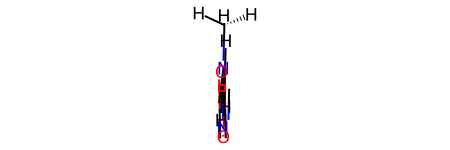

In [12]:
raw_mol = Chem.MolFromXYZBlock(ind)
bond_moll = Chem.Mol(raw_mol)
rdDetermineBonds.DetermineBonds(bond_moll,charge=0)
print(Chem.MolToSmiles(Chem.RemoveHs(bond_moll)))
print(Chem.CanonSmiles(smi))
bond_moll

## Initial support for non-tetrahedral stereochemistry
(2022.09 release)

There's more information on this in the RDKit Book.

With the 2022.09 release of the RDKit we have started to add support for non-tetrahedral stereochemistry.
The three non-tetrahedral coordination types supported are: square planar, trigonal bipyramidal, and octahedral.
There's still a lot of work left to do, but this is a real start.

The functionality which is currently supported includes:
- Parsing SMILES
- Perceiving stereo from 2D or 3D
- Generating non-canonical SMILES


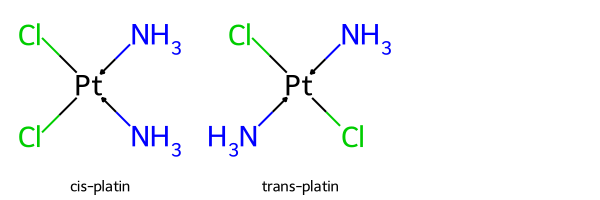

In [15]:
cis_plati = Chem.MolFromSmiles('Cl[Pt@SP1](Cl)(<-[NH3])<-[NH3]')
trans_plati = Chem.MolFromSmiles('Cl[Pt@SP2](Cl)(<-[NH3])<-[NH3]')
Draw.MolsToGridImage([cis_plati,trans_plati],legends=['cis-platin','trans-platin'])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

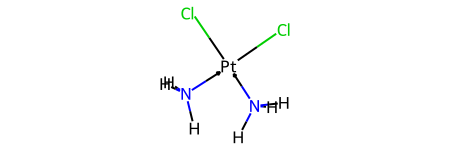

In [16]:
from rdkit.Chem import rdDistGeom
ch = Chem.AddHs(cis_plati)
th = Chem.AddHs(trans_plati)
rdDistGeom.EmbedMolecule(ch)
ch

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

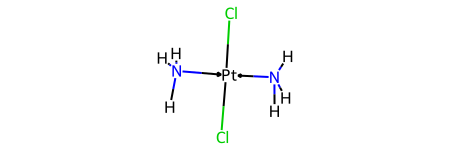

In [17]:
rdDistGeom.EmbedMolecule(th)
th